# Video Game Sales Analysis

Welcome to the Video Game Sales Analysis project! In this data analysis endeavor, we will delve into a comprehensive dataset containing information about video games with sales exceeding 100,000 copies. This dataset was meticulously scraped from vgchartz.com, a renowned source for video game sales data.

## Project Overview

Video games have become a global cultural phenomenon, with millions of copies sold each year across various gaming platforms. This project aims to uncover valuable insights and trends within the video game industry by examining the dataset's extensive information, which includes:

- **Rank:** The ranking of video games based on overall sales.
- **Name:** The title of the game.
- **Platform:** The platform on which the game was released (e.g., PC, PS4, Xbox, etc.).
- **Year:** The year of the game's release.
- **Genre:** The genre or category of the game.
- **Publisher:** The company responsible for publishing the game.
- **Sales Data:** Sales figures for North America, Europe, Japan, and the rest of the world, as well as global sales totals.

## Project Objectives

Our project aimed to achieve a comprehensive understanding of the video game industry through the following key objectives:

1. **Sales Trends Over Time:** Analyze the historical sales trends of video games to identify patterns and fluctuations in global game sales over the years.

2. **Sales By Genre:** Investigate the popularity of different game genres based on sales figures and uncover any emerging trends in genre preferences.

3. **Sales By Platform:** Determine the most successful gaming platforms by examining total sales and track changes in platform popularity over time.

4. **Identify Top Publishers, Genres, and Platforms:** Identify the top-performing publishers, game genres, and gaming platforms based on their sales performance.

5. **Calculate Market Share Over the Years:** Calculate and interpret market share trends for various regions, shedding light on the regions that contribute most significantly to the global market.

6. **Interpretation of Market Share Trends:** Provide insights into the implications of market share trends, highlighting whether certain regions are gaining or losing importance in the industry.

7. **Analyze Genre Popularity:** Explore genre popularity in specific regions and identify variations in genre preferences among different markets.

8. **Analyze Genre Success in Specific Regions:** Investigate how well specific game genres perform in individual regions and pinpoint games that excel in particular markets.

9. **Visualize Genre Trends Over Time:** Create visualizations to illustrate the evolution of genre preferences over time and capture shifts in genre popularity.

10. **Analyze Publisher Performance:** Evaluate the performance of game publishers based on sales data, identifying publishers with consistent success and influence in the industry.

11. **Analyze Consistency in Publisher Performance:** Examine whether publishers maintain consistent performance across various regions and platforms.

12. **Interpretation of Publisher Performance:** Interpret the significance of publisher performance and its impact on the gaming industry.

13. **Regional Sales Analysis:** Investigate regional variations in video game sales, comparing sales figures in North America, Europe, Japan, and other regions. Identify games that perform exceptionally well or poorly in specific regions.

These objectives guided our analysis and provided a structured approach to gaining insights into the video game industry. By addressing each of these objectives, we aimed to develop a comprehensive understanding of market dynamics, preferences, and trends within the gaming world.

## Data Sources

The dataset used in this project is available on kaggle and was collected from vgchartz.com using a custom web scraping script  
https://www.kaggle.com/datasets/gregorut/videogamesales

## Tools and Technologies

We will leverage popular data analysis and visualization tools such as Python, Pandas, Matplotlib.

## Let's Get Started!

Happy gaming and data exploration!

In [1]:
#  Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the data

data = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
data.describe(include="all")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


# Sales Trends Over Time

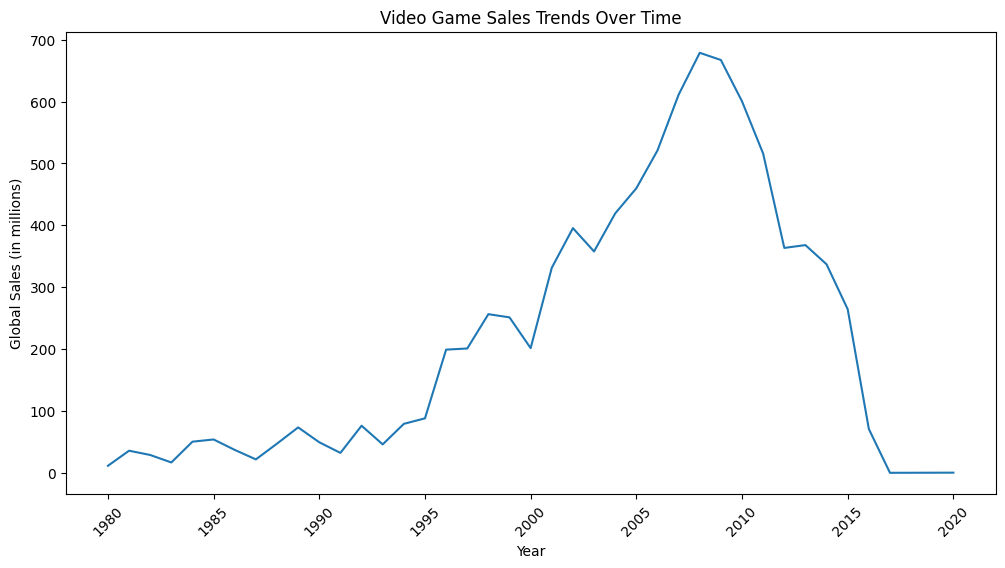

In [6]:
# Group data by year and sum global sales for each year
sales_by_year = data.groupby('Year')['Global_Sales'].sum()

# Create a line plot for sales trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_by_year.index, y=sales_by_year.values)
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.title('Video Game Sales Trends Over Time')
plt.xticks(rotation=45)
plt.show()

# Sales By Genre

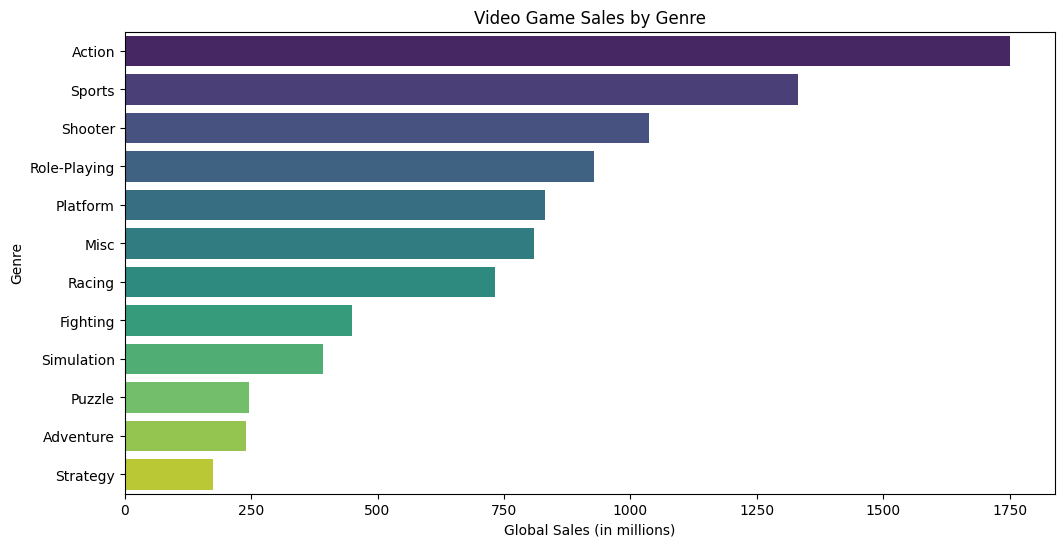

In [7]:
# Group data by genre and sum global sales for each genre
sales_by_genre = data.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Create a bar plot for sales by genre
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_genre.values, y=sales_by_genre.index, palette='viridis')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Genre')
plt.title('Video Game Sales by Genre')
plt.show()

# Sales By Platform

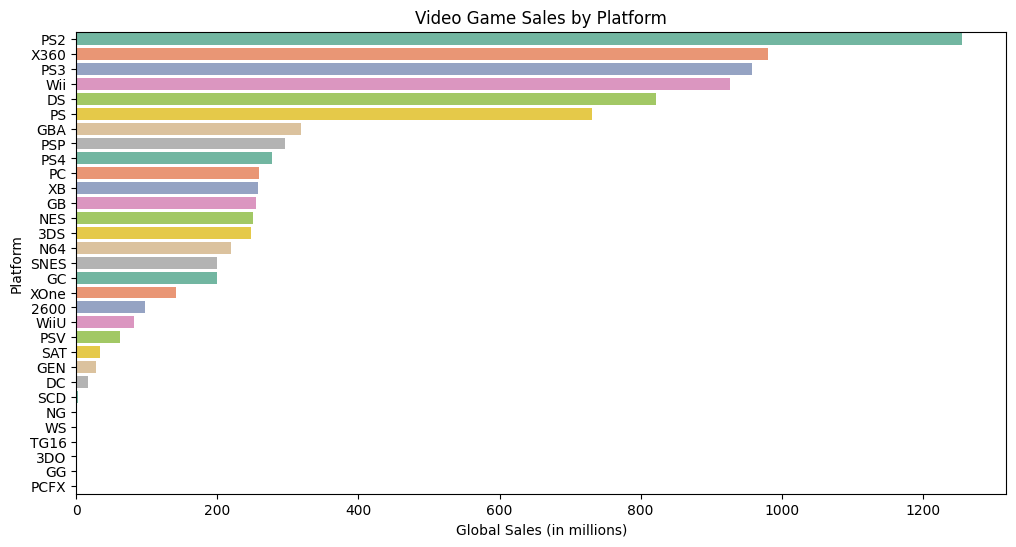

In [8]:
# Group data by platform and sum global sales for each platform
sales_by_platform = data.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# Create a bar plot for sales by platform
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_platform.values, y=sales_by_platform.index, palette='Set2')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Platform')
plt.title('Video Game Sales by Platform')
plt.show()

# Identify Top Publishers, Genres, and Platforms

In [9]:
# Identify top publishers
top_publishers = data.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

# Identify top genres
top_genres = data.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(5)

# Identify top platforms
top_platforms = data.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(5)

print("Top Publishers:\n", top_publishers)
print("\nTop Genres:\n", top_genres)
print("\nTop Platforms:\n", top_platforms)

Top Publishers:
 Publisher
Nintendo                        1786.56
Electronic Arts                 1110.32
Activision                       727.46
Sony Computer Entertainment      607.50
Ubisoft                          474.72
Take-Two Interactive             399.54
THQ                              340.77
Konami Digital Entertainment     283.64
Sega                             272.99
Namco Bandai Games               254.09
Name: Global_Sales, dtype: float64

Top Genres:
 Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Name: Global_Sales, dtype: float64

Top Platforms:
 Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
Name: Global_Sales, dtype: float64


# Calculate Market Share Over the Years

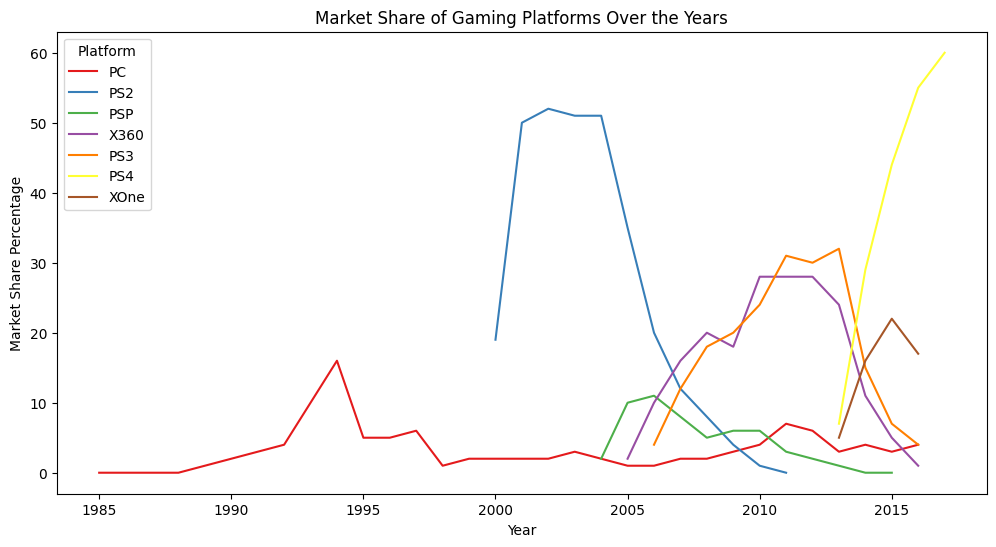

In [10]:
# Group data by year and platform, and sum global sales for each group
platform_sales_by_year = data.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()

# Calculate total global sales for each year
total_sales_by_year = platform_sales_by_year.groupby('Year')['Global_Sales'].sum()

# Calculate market share for each platform in each year
platform_sales_by_year['Market_Share_Percentage'] = round(
    platform_sales_by_year['Global_Sales'] / platform_sales_by_year['Year'].map(total_sales_by_year)*100
)

# Filter for specific platforms of interest (e.g., PC, PS3, PS4, Xbox)
platforms_of_interest = ['PC','PSP', 'PS2', 'PS3', 'PS4', 'X360', 'XOne']  # Add more platforms as needed
filtered_data = platform_sales_by_year[platform_sales_by_year['Platform'].isin(platforms_of_interest)]

# Create a line plot for the market share of selected platforms over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Market_Share_Percentage', hue='Platform', data=filtered_data, palette='Set1')
plt.xlabel('Year')
plt.ylabel('Market Share Percentage')
plt.title('Market Share of Gaming Platforms Over the Years')
plt.legend(title='Platform')
plt.show()


## Interpretation of Market Share Trends

### Platform Analysis

1. **Platform Dominance**: The line plot illustrates the market share trends of gaming platforms, including **PC**,**PSP**, **PS2**, **PS3**, **PS4**, **Xbox 360 (X360)**, and **Xbox One (XOne)**, over the years.

2. **Stability and Growth**: We observe that **PC** has consistently held a strong position in the market, demonstrating its stability and enduring popularity. 

3. **Emerging Trends**: Notably, **PS4** has shown significant growth in market share over the past few years, indicating a rising trend in its popularity among gamers.

4. **Competitive Landscape**: The competition between **PC** and **PS4** is particularly interesting. While **PC** has historically had a significant market share, **PS4** has been steadily gaining ground, narrowing the gap between them.

# Analyze Genre Popularity

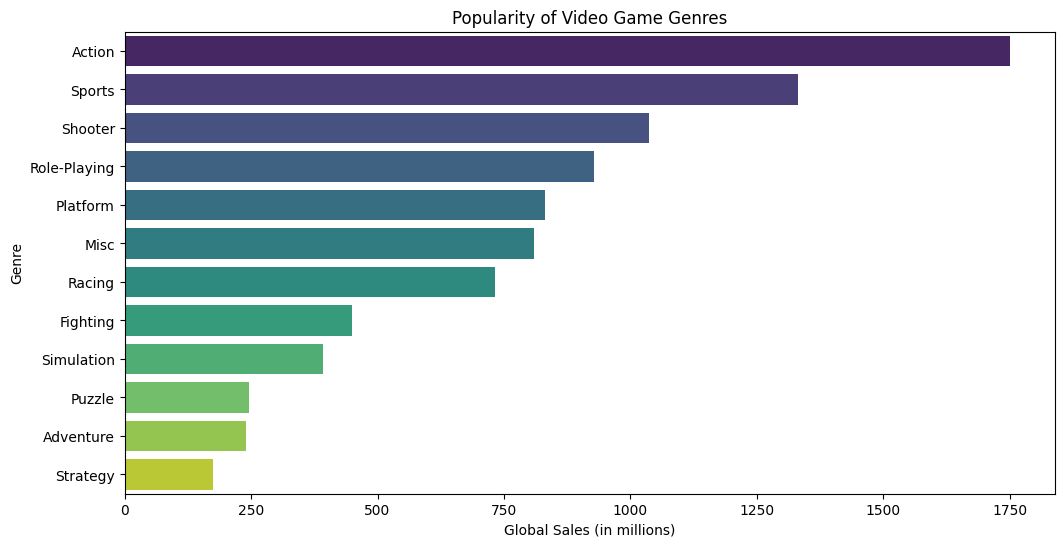

In [11]:
# Group data by genre and sum global sales for each genre
genre_sales = data.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Create a bar plot to visualize genre popularity
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='viridis')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Genre')
plt.title('Popularity of Video Game Genres')
plt.show()


#  Analyze Genre Success in Specific Regions

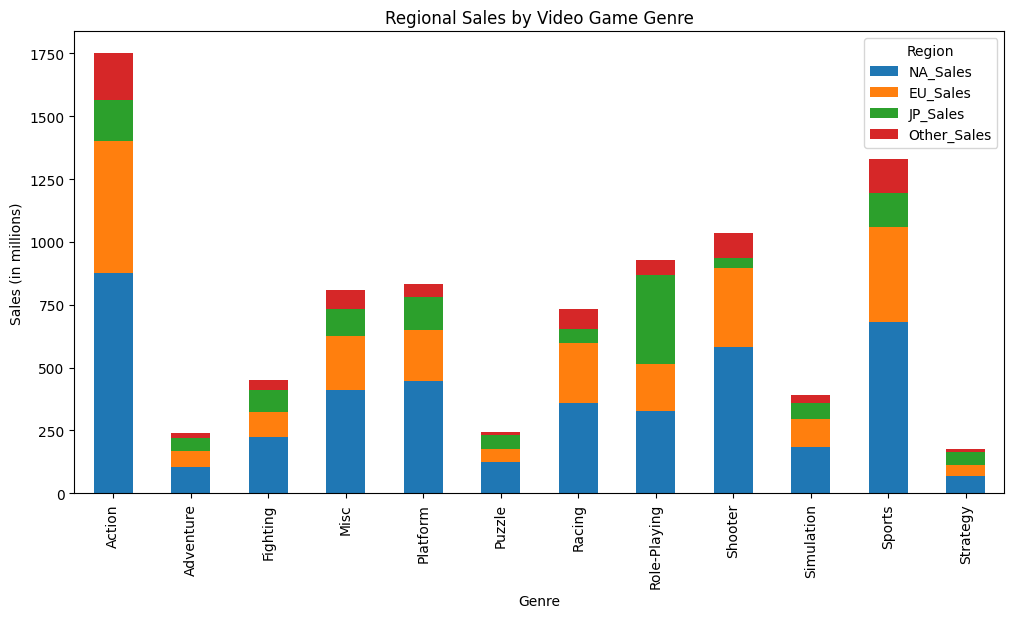

In [12]:
# Group data by genre and sum sales in specific regions
region_sales = data.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Create a stacked bar plot to visualize regional sales by genre
region_sales.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')
plt.title('Regional Sales by Video Game Genre')
plt.legend(title='Region')
plt.show()

# Visualize Genre Trends Over Time

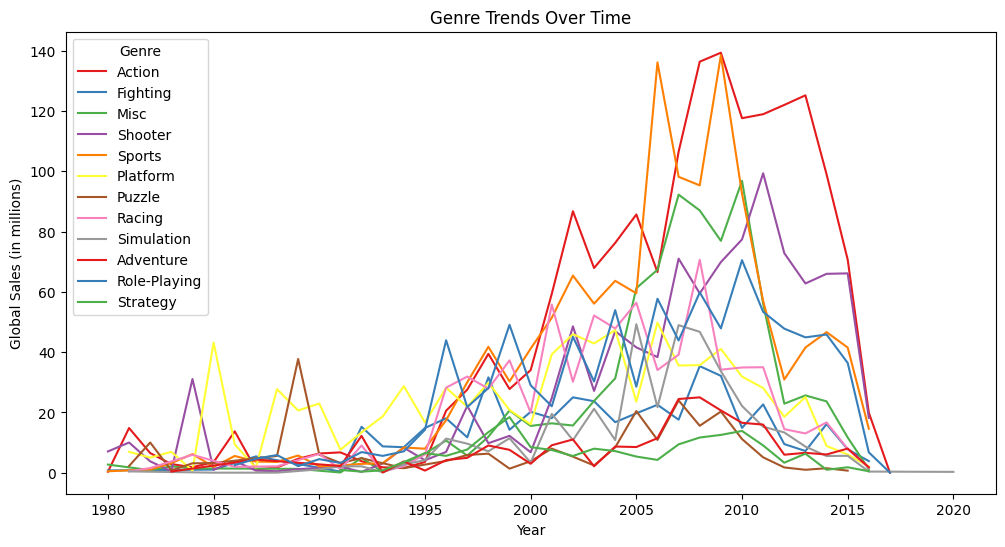

In [13]:
# Group data by year and genre, and sum global sales for each group
genre_sales_by_year = data.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

# Create a line plot to visualize genre trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Global_Sales', hue='Genre', data=genre_sales_by_year, palette='Set1')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.title('Genre Trends Over Time')
plt.legend(title='Genre')
plt.show()

# Analyze Publisher Performance

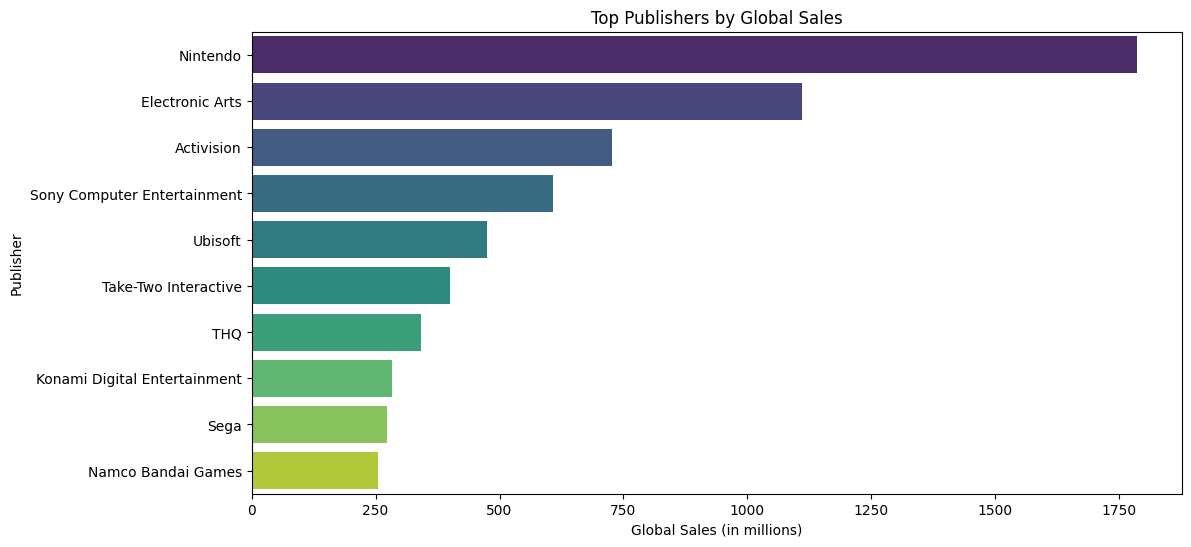

In [14]:
# Group data by publisher and sum global sales for each publisher
publisher_sales = data.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

# Create a bar plot to visualize publisher performance
plt.figure(figsize=(12, 6))
sns.barplot(x=publisher_sales.head(10).values, y=publisher_sales.head(10).index, palette='viridis')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Publisher')
plt.title('Top Publishers by Global Sales')
plt.show()

# Analyze Consistency in Publisher Performance

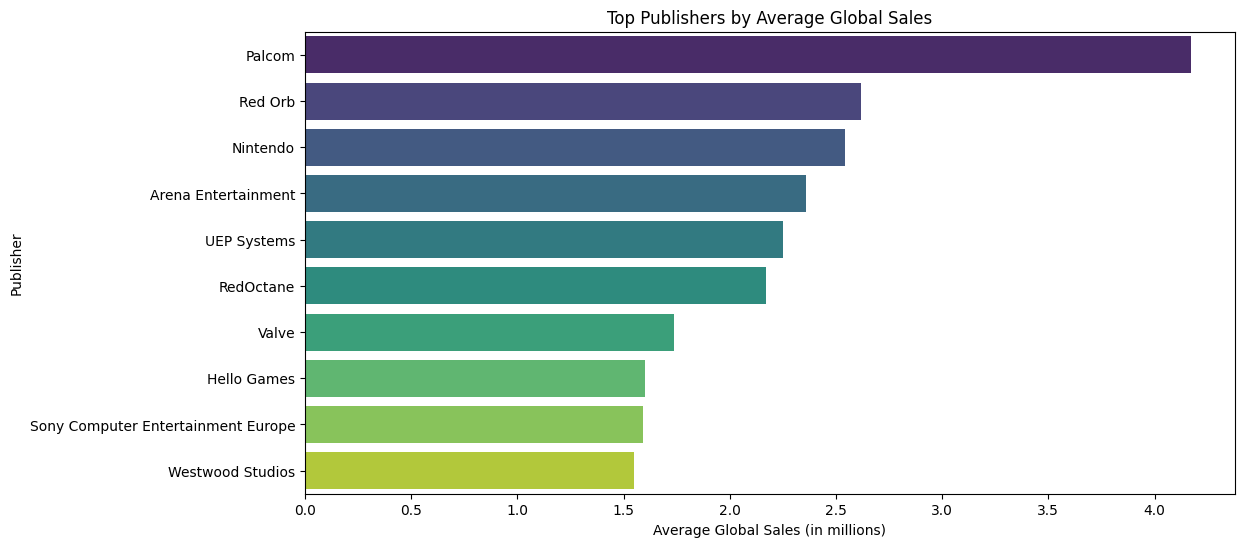

In [15]:
# Calculate the average global sales for each publisher
average_sales_by_publisher = data.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False)

# Create a bar plot to visualize average sales by publisher
plt.figure(figsize=(12, 6))
sns.barplot(x=average_sales_by_publisher.head(10).values, y=average_sales_by_publisher.head(10).index, palette='viridis')
plt.xlabel('Average Global Sales (in millions)')
plt.ylabel('Publisher')
plt.title('Top Publishers by Average Global Sales')
plt.show()

## Interpretation of Publisher Performance

### Top Publishers by Total Global Sales

1. **Publisher Dominance**: The bar plot "Top Publishers by Global Sales" provides a clear picture of the top publishers in the video game industry based on their total global sales. Notably, **Nintendo** emerges as the dominant player, demonstrating a substantial lead in terms of total sales.

2. **Key Players**: Beyond **Nintendo**, other major publishers such as **Electronic Arts** and **Activision** also exhibit strong performance in terms of total global sales. Their consistent presence among the top publishers underscores their significant contributions to the industry.

3. **Market Leadership**: The total global sales of these top publishers suggest their market leadership and their ability to create and market successful games that resonate with a global audience.

### Top Publishers by Average Global Sales

4. **Consistency in Success**: The bar plot "Top Publishers by Average Global Sales" delves deeper into publisher performance by examining their average global sales per game. This metric provides insights into publishers that consistently produce top-selling titles.

5. **Nintendo**: Notably, **Nintendo** stands out as a publisher that not only achieves high total sales but also maintains a consistently high average sales figure. This suggests a strong track record of creating consistently successful games.

6. **Sony Computer Entertainment Europe**: Similarly, **Sony Computer Entertainment Europe** demonstrates impressive consistency in producing top-selling games. Their ability to maintain high average sales indicates a reliable game development and marketing strategy.

# Regional Sales Analysis

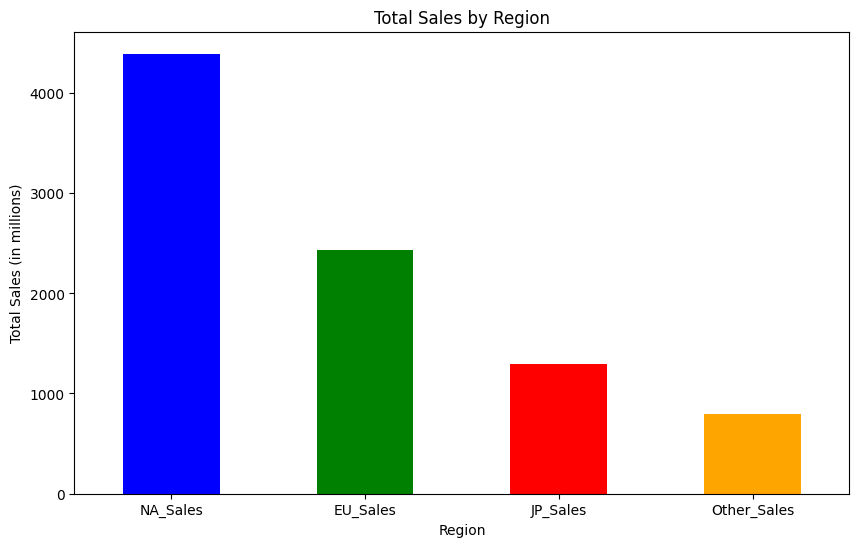

Top 5 Games in North America:
                Name  NA_Sales
0         Wii Sports     41.49
1  Super Mario Bros.     29.08
9          Duck Hunt     26.93
5             Tetris     23.20
2     Mario Kart Wii     15.85

Top 5 Games in Europe:
                  Name  EU_Sales
0           Wii Sports     29.02
2       Mario Kart Wii     12.88
3    Wii Sports Resort     11.01
10          Nintendogs     11.00
16  Grand Theft Auto V      9.27

Top 5 Games in Japan:
                             Name  JP_Sales
4        Pokemon Red/Pokemon Blue     10.22
12    Pokemon Gold/Pokemon Silver      7.20
1               Super Mario Bros.      6.81
6           New Super Mario Bros.      6.50
20  Pokemon Diamond/Pokemon Pearl      6.04

Top 5 Games in Other Regions:
                             Name  Other_Sales
17  Grand Theft Auto: San Andreas        10.57
0                      Wii Sports         8.46
47                 Gran Turismo 4         7.53
16             Grand Theft Auto V         4.14
2        

In [16]:
# Define the regions you want to analyze
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# Calculate total sales for each region
region_sales = data[regions].sum()

# Visualize regional sales
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Region')
plt.ylabel('Total Sales (in millions)')
plt.title('Total Sales by Region')
plt.xticks(rotation=0)
plt.show()

# Identify games that perform exceptionally well or poorly in specific regions
top_na_games = data.nlargest(5, 'NA_Sales')[['Name', 'NA_Sales']]
top_eu_games = data.nlargest(5, 'EU_Sales')[['Name', 'EU_Sales']]
top_jp_games = data.nlargest(5, 'JP_Sales')[['Name', 'JP_Sales']]
top_other_games = data.nlargest(5, 'Other_Sales')[['Name', 'Other_Sales']]

print("Top 5 Games in North America:")
print(top_na_games)
print("\nTop 5 Games in Europe:")
print(top_eu_games)
print("\nTop 5 Games in Japan:")
print(top_jp_games)
print("\nTop 5 Games in Other Regions:")
print(top_other_games)


# Conclusion

In summary, our analysis of video game sales data has yielded valuable insights into industry trends, preferences, and performance. These findings can inform decision-makers in the gaming world and deepen our understanding of market dynamics. We trust that this analysis will contribute to a more informed gaming industry and serve as a valuable resource for future endeavors.

